# HW 1 Notebook

## 2 - sph. geom vs flat geometry

In [57]:
import astropy
import numpy as np
import matplotlib.pyplot as plt

In [46]:
np.__version__

'1.25.2'

In [48]:
np.cos(1)

0.5403023058681398

In [49]:
# calculate angular distance between two RA/Dec using sph. geometry
def sph_angdist(pos1, pos2):
    '''pos1 = single indexed np array [ra, dec] in radians
    '''
    ra1 = pos1[0]
    ra2 = pos2[0]
    dec1 = pos1[1]
    dec2 = pos2[1]
    theta = np.arccos(np.cos(dec1)*np.cos(dec2)*np.cos(ra2-ra1)+np.sin(dec1)*np.sin(dec2))
    return theta

In [50]:
# calculate angular distance between two RA/Dec using pythagorean theorem
def mink_angdist(pos1, pos2):
    '''pos1 = single indexed np array [ra, dec] in radians
    '''
    ra1 = pos1[0]
    ra2 = pos2[0]
    dec1 = pos1[1]
    dec2 = pos2[1]
    theta = np.sqrt((dec2-dec1)**2 + ((ra2-ra1)*np.cos(np.mean([dec1, dec2])))**2)
    return theta

In [51]:
# sample ra/dec points
pos1s = np.zeros((2,10))
pos2s = np.zeros((2,10))

pos1s[0,:] = np.linspace(0, 180, 10) # ra1
pos2s[0,:] = np.linspace(5, 185, 10) # ra2
pos1s[1,:] = np.linspace(0, 90, 10) # dec1
pos2s[1,:] = np.linspace(0,-90, 10) # dec2

In [66]:
pos1s

array([[  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.],
       [  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.]])

In [67]:
pos2s

array([[  5.,  25.,  45.,  65.,  85., 105., 125., 145., 165., 185.],
       [  0., -10., -20., -30., -40., -50., -60., -70., -80., -90.]])

In [65]:
print(np.radians(pos1s))

[[0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
  2.0943951  2.44346095 2.7925268  3.14159265]
 [0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
  1.04719755 1.22173048 1.3962634  1.57079633]]


In [68]:
# calculating various arc lengths
arclengths = np.zeros((2, 10))
pos2s = np.zeros((2,10))
arclengths[0] = sph_angdist(np.radians(pos1s), np.radians(pos2s))
arclengths[1] = mink_angdist(np.radians(pos1s), np.radians(pos2s))

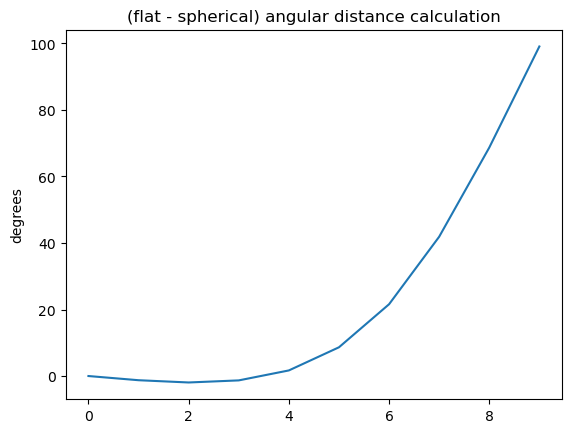

In [75]:
plt.figure()
plt.plot(np.degrees(arclengths[1])-np.degrees(arclengths[0]))
plt.title('(flat - spherical) angular distance calculation')
plt.ylabel('degrees')
plt.show()

## Question 5